In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import json

In [2]:
data = pd.read_csv('DF_all_w_codon_counts.csv', index_col=0)
data

,prest_id,uniprot_id,conc_cf,aa_seq,nt_seq,aa_len,true_nt_seq,AAA,AAT,AAC,...,GTC,GTG,GCA,GCT,GCC,GCG,GGA,GGT,GGC,GGG
0,140095,G3V3N0,4.30750,IMTAPSSFEQFKVAMNYLQLYNVPDCLEDIQDADCSSSKCSSSASS...,GACAAGCTTGCGGCCGCAATTATGACAGCTCCCTCCAGTTTTGAGC...,139,ATTATGACAGCTCCCTCCAGTTTTGAGCAGTTTAAAGTGGCAATGA...,8,6,3,...,0,4,3,4,1,1,1,1,3,2
1,140099,G3V537,2.91540,TYYAWKHELLGSGTCPALPPREVLGMEELEKLPEEQVAEEELECSA...,GACAAGCTTGCGGCCGCAACCTACTATGCCTGGAAGCATGAGCTGC...,144,ACCTACTATGCCTGGAAGCATGAGCTGCTGGGCTCTGGCACCTGCC...,1,2,2,...,1,3,4,4,6,3,1,1,5,5
2,140225,P12724,1.48770,SLHARPPQFTRAQWFAIQHISLNPPRCTIAMRAINNYRWRCKNQNT...,GACAAGCTTGCGGCCGCATCACTCCATGCCAGACCCCCACAGTTTA...,136,TCACTCCATGCCAGACCCCCACAGTTTACGAGGGCTCAGTGGTTTG...,1,7,8,...,0,2,5,2,2,1,1,2,1,0
3,140235,H0YH02,6.72240,ARALNESKRVNNGNTAPEDSSPAKKTRRCQRQESKKMPVAGGKANK...,GACAAGCTTGCGGCCGCAGCGAGAGCATTAAATGAAAGCAAAAGAG...,123,GCGAGAGCATTAAATGAAAGCAAAAGAGTTAATAATGGCAACACGG...,5,7,5,...,2,5,1,5,4,2,3,0,3,1
4,140309,F5GYC5,3.38480,HRKEPGARLEATRGAARPHKQGTKPMITRPSVSQLGEGKCPSSQHL...,GACAAGCTTGCGGCCGCACATCGGAAAGAGCCTGGGGCAAGGCTGG...,124,CATCGGAAAGAGCCTGGGGCAAGGCTGGAGGCCACAAGAGGAGCTG...,4,1,1,...,0,1,2,3,4,1,3,2,1,3
5,140325,O43506,1.50290,FVGWWTHQRFVELVVVVDNIRYLFSQSNATTVQHEVFNVVNIVDSF...,GACAAGCTTGCGGCCGCATTTGTGGGCTGGTGGACCCATCAGCGGT...,137,TTTGTGGGCTGGTGGACCCATCAGCGGTTTGTTGAGCTGGTAGTGG...,2,10,3,...,3,5,3,0,1,1,4,1,3,0
6,140342,H0YJF0,3.52970,ASHGPMSLGELELEPNSKLVLPTTLLTAQENDVNLPVAAEDFSQYQ...,GACAAGCTTGCGGCCGCAGCTAGTCATGGTCCAATGAGTTTGGGAG...,146,GCTAGTCATGGTCCAATGAGTTTGGGAGAATTGGAGTTGGAGCCAA...,3,6,1,...,0,3,3,3,2,1,1,3,1,1
7,140345,Q96BY2,3.40160,RKALLIAGISQSCSVAEIEEALQAGLAPLGEYRLLGRMFRRDENRK...,GACAAGCTTGCGGCCGCACGGAAAGCGCTATTGATTGCCGGCATCT...,141,CGGAAAGCGCTATTGATTGCCGGCATCTCCCAGAGCTGCAGTGTGG...,3,3,1,...,1,3,3,5,5,4,4,3,5,3
8,140354,O95072,0.92003,RRRLLFWDKETQISPEKFQEQLQTRAHCWECPMVQPPERTIRGPAE...,GACAAGCTTGCGGCCGCACGTCGCCGGTTACTGTTCTGGGACAAGG...,134,CGTCGCCGGTTACTGTTCTGGGACAAGGAGACTCAGATCTCCCCGG...,2,0,0,...,1,2,2,2,5,2,0,1,3,0
9,140443,H0YJ73,6.01710,IKSCCGGCFYGETEKHNFSVERDFKAAVPNSQNATISVPPLTSVSV...,GACAAGCTTGCGGCCGCAATAAAGAGTTGCTGTGGAGGATGTTTCT...,139,ATAAAGAGTTGCTGTGGAGGATGTTTCTATGGTGAAACAGAAAAAC...,4,2,2,...,1,4,3,1,1,1,5,1,3,0


In [3]:
def nt_seq_to_list(nt_sequence):
    return np.array(list(map(''.join, zip(*[iter(str(nt_sequence))]*3))))

data['codon_array'] = data['true_nt_seq'].apply(nt_seq_to_list)

In [4]:
# filtering out the sequences with codon fragments
weird_seq_len = []
for idx, row in data.iterrows():
    if len(str(row['true_nt_seq']))%3:
        weird_seq_len.append(idx)

data.drop(weird_seq_len, inplace=True)
# looks like I already cleaned it in the previous notebook....

##### converted to markdown so i don't accidentally run this again.
# random colors? colors coded by base? not so sure...
codon_list = ['AAA', 'AAT', 'AAC', 'AAG', 'ATA', 'ATT', 'ATC', 'ATG', 'ACA', 'ACT',
              'ACC', 'ACG', 'AGA', 'AGT', 'AGC', 'AGG', 'TAA', 'TAT', 'TAC', 'TAG',
              'TTA', 'TTT', 'TTC', 'TTG', 'TCA', 'TCT', 'TCC', 'TCG', 'TGA', 'TGT',
              'TGC', 'TGG', 'CAA', 'CAT', 'CAC', 'CAG', 'CTA', 'CTT', 'CTC', 'CTG',
              'CCA', 'CCT', 'CCC', 'CCG', 'CGA', 'CGT', 'CGC', 'CGG', 'GAA', 'GAT',
              'GAC', 'GAG', 'GTA', 'GTT', 'GTC', 'GTG', 'GCA', 'GCT', 'GCC', 'GCG',
              'GGA', 'GGT', 'GGC', 'GGG']

# start with random color generator to build color dict...
def random_color_generator():
    r = np.random.uniform(0, 1)
    g = np.random.uniform(0, 1)
    b = np.random.uniform(0, 1)
    a = np.random.uniform(0, 1)
    return [r, g, b, a]

# 'official' codon colors... this is probably going to make for a real ugly barcode
codon_colors = {}
for codon in codon_list:
    codon_colors[codon] = random_color_generator()
codon_colors


# save to a json for reuse
import json

with open('codon_colors.json', 'w') as f:
    # sort and indent for to make more prettier
    json.dump(codon_colors, f, sort_keys=True, indent=4)

# start here if we're sticking with those random colors

In [7]:
with open('codon_colors.json', 'r') as fp:
    codon_colors = json.load(fp)

In [8]:
def list_to_color_matrix(codon_array):
    # mark for garbage if codon_array is nan
    if str(codon_array[0]) == 'nan':
        return

    # otherwise return color matrix
    color_matrix = np.ndarray(shape=(len(codon_array), 4))
    for idx, codon in enumerate(codon_array):
        color_matrix[idx] = np.array(codon_colors[codon])
        
    return color_matrix

data['color_matrix'] = data['codon_array'].apply(list_to_color_matrix)

In [9]:
# can't really figure out why this is thinking we have nan values...
data[data['color_matrix'] == np.nan]

,prest_id,uniprot_id,conc_cf,aa_seq,nt_seq,aa_len,true_nt_seq,AAA,AAT,AAC,...,GCA,GCT,GCC,GCG,GGA,GGT,GGC,GGG,codon_array,color_matrix


In [10]:
data['color_matrix'][1].shape

(151, 4)

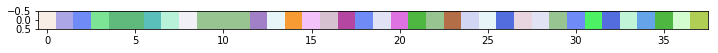

In [11]:
# show sequence barcode (chose row 45000 since it's short and the visualization is better)
barcode = data['color_matrix'][45000].reshape(1, len(data['color_matrix'][45000]), 4)

plt.figure(figsize=(12, 8))
plt.imshow(barcode, interpolation='nearest')
plt.show()

In [19]:
color_data = data[['prest_id', 'uniprot_id', 'conc_cf', 'color_matrix']]
color_data.shape

(45206, 4)

In [21]:
color_data.loc[:11301, :].to_csv('DF_color_1.csv')
color_data.loc[11301:22601, :].to_csv('DF_color_2.csv')
color_data.loc[22601:33901, :].to_csv('DF_color_3.csv')
color_data.loc[33901:, :].to_csv('DF_color_4.csv')

In [95]:
reduced_data = data[['prest_id', 'uniprot_id', 'conc_cf', 'true_nt_seq', 'codon_array']]
reduced_data.to_csv('reduced_features_data.csv')

In [100]:
codon_colors

{'AAA': [0.964157101750617,
  0.9054801587088959,
  0.8509011281496508,
  0.6613001687585417],
 'AAC': [0.6329214975922398,
  0.7006857820076735,
  0.5182615127712468,
  0.4328498800199728],
 'AAG': [0.20798283859376399,
  0.85873415405451,
  0.5681010303186899,
  0.349042267212302],
 'AAT': [0.7953773476618329,
  0.1327123485684395,
  0.8139586181706189,
  0.6363194414819645],
 'ACA': [0.5855959465704637,
  0.5772670660681146,
  0.06713086905558696,
  0.9183664228405541],
 'ACC': [0.013574272678167909,
  0.4886114754109594,
  0.35155372364608184,
  0.8193653748747558],
 'ACG': [0.40533473967298783,
  0.5177035648425149,
  0.35470254507216237,
  0.2067312529591686],
 'ACT': [0.4165372815380113,
  0.4734343420638095,
  0.8387333944473572,
  0.29849191083189386],
 'AGA': [0.22068201349446637,
  0.6657265513625003,
  0.3626029423871783,
  0.8043487090232694],
 'AGC': [0.2764316826095664,
  0.12096872104011547,
  0.9944943230375138,
  0.7906336308608611],
 'AGG': [0.215805357390212,
  0.28